# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
paste your banner id and verification code here...

```
banner id:          904437542
verification code:  18c872424f92


## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2733 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1004,2025-11-14 06:08:00,Downtown,113,1.0,4.07,Credit,False
1,1001,2025-11-14 06:26:00,Campus,114,1.0,4.52,Credit,False
2,1000,2025-11-14 06:29:00,Downtown,113,1.0,4.59,Mobile,True
3,1002,2025-11-14 06:39:00,Campus,101,1.0,2.75,Credit,False
4,1003,2025-11-14 06:51:00,Campus,111,1.0,2.84,Credit,False


In [148]:
# Products catalog
products


,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [149]:
# Task 1: use isna(), nunique(), min/max on timestamp
# The number of missing values in each column
print(f"The number of missing value in each column: \n{sales.isna().sum()}\n")

# The number of unique product IDs in the sales data and compare to the catalog size
unique_productIDs_in_the_sales = sales['product_id'].nunique()
size_productIDs_in_the_Catalog = len('product_id')
print(f"The number of unique product IDs in the sales data: {unique_productIDs_in_the_sales}")
print(f"The total number of productIDs in the catalog: {size_productIDs_in_the_Catalog}\n")

# The date range (earliest and latest transaction)
print('Date range:')
sales['timestamp'] =  pd.to_datetime(sales['timestamp'])
print(f"Earliest transaction: {sales['timestamp'].min()}")
print(f"Latest transaction: {sales['timestamp'].max()}")

The number of missing value in each column: 
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          4
revenue           5
payment_method    0
loyalty_member    0
dtype: int64

The number of unique product IDs in the sales data: 21
The total number of productIDs in the catalog: 10

Date range:
Earliest transaction: 2025-11-14 06:08:00
Latest transaction: 2025-11-27 21:49:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [150]:
# Task 2: use pd.merge() with appropriate join type
# To merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.
merged_dataset = pd.merge(sales, products, on= 'product_id', how='left')
print(merged_dataset)

# For verification purpose
print(f"The merged dataset first few rows: \n{merged_dataset.head()}")
print(f"The merged dataset shape: {merged_dataset.shape}")

      transaction_id           timestamp  location  product_id  quantity  \
0               1004 2025-11-14 06:08:00  Downtown         113       1.0   
1               1001 2025-11-14 06:26:00    Campus         114       1.0   
2               1000 2025-11-14 06:29:00  Downtown         113       1.0   
3               1002 2025-11-14 06:39:00    Campus         101       1.0   
4               1003 2025-11-14 06:51:00    Campus         111       1.0   
...              ...                 ...       ...         ...       ...   
2728            3725 2025-11-27 20:23:00  Downtown         112       1.0   
2729            3726 2025-11-27 20:36:00    Suburb         116       1.0   
2730            3723 2025-11-27 20:58:00  Downtown         101       1.0   
2731            3728 2025-11-27 21:32:00    Campus         114       1.0   
2732            3727 2025-11-27 21:49:00  Downtown         104       1.0   

      revenue payment_method  loyalty_member           name  category  cost  
0        

## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [151]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
# To compare the shape of the merged DataFrame to the original sales data
print(f"The original shape of the sales: {sales.shape}")
print(f"The merged dataset shape: {Merged_dataset.shape}")
print(f"Comparing the shapes based on rows: {sales.shape[0] == Merged_dataset.shape[0]}\n")

# To check if any rows have missing values in the product columns (name, category, cost)
product_column = ['name', 'category', 'cost']
print(f"The missing values after merging:  \n{merged_dataset[product_column].isna().sum()}\n")

# To identify which product_id(s) are causing the problem
missing_products = merged_dataset[merged_dataset['name'].isna()]['product_id'].unique()
if len(missing_products) > 0:
    print(f"The products causing the problem: {missing_products}")
    print(f"The number of affected transactions: {merged_dataset['name'].isna().sum()}")

The original shape of the sales: (2733, 8)
The merged dataset shape: (2733, 11)
Comparing the shapes based on rows: True

The missing values after merging:  
name        14
category    14
cost        14
dtype: int64

The products causing the problem: [199 200 201]
The number of affected transactions: 14


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [152]:
# Task 4: create profit column, then groupby with .agg()
# To calculate profit for each transaction
merged_dataset['profit'] = merged_dataset['revenue'] - (merged_dataset['cost'] * merged_dataset['quantity'])
print(f"The profit for each transaction: \n{merged_dataset['profit']}\n")

# To summarize profitability by product category
profit_by_category = merged_dataset.groupby('category').agg({'profit': 'sum', 'transaction_id': 'count'}).rename(columns= {'transaction_id': 'num_transactions'})
print(f"The profitability by product category: \n{profit_by_category}\n")

# To sort it by total profit (highest first).
sort_total_profit_by_category = profit_by_category.sort_values('profit', ascending=False)
print(f"The sorted of total profit (highest first) : \n{sort_total_profit_by_category}")

The profit for each transaction: 
0       2.97
1       3.12
2       3.49
3       1.55
4       1.84
        ... 
2728    2.40
2729    4.37
2730    2.13
2731    2.99
2732    1.78
Name: profit, Length: 2733, dtype: float64

The profitability by product category: 
           profit  num_transactions
category                           
Coffee    2394.13               956
Pastry    1611.78               556
Sandwich  4294.84               624
Tea        872.69               583

The sorted of total profit (highest first) : 
           profit  num_transactions
category                           
Sandwich  4294.84               624
Coffee    2394.13               956
Pastry    1611.78               556
Tea        872.69               583


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [153]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
# To group profitability by category and location 
profit_groupby_category_location = merged_dataset.groupby(['category', 'location']).agg(
    total_profit = ('profit', 'sum'), average_profit = ('profit', 'mean'), num_transaction = ('profit', 'mean'))
print(f"The grouping of profitability by category and location: \n{profit_groupby_category_location}\n")

# To reset index to make it a falt table (not nested/hierarchical)
profit_groupby_category_location = profit_groupby_category_location.reset_index()
print(f" After the reset of the index: \n{profit_groupby_category_location}")

# To sort by total profit(highest first)
profit_groupby_category_location = profit_groupby_category_location.sort_values('total_profit', ascending=False)
profit_groupby_category_location = profit_groupby_category_location.reset_index()
print(profit_groupby_category_location)


The grouping of profitability by category and location: 
                   total_profit  average_profit  num_transaction
category location                                               
Coffee   Campus         1050.50        2.059804         2.059804
         Downtown       1131.18        3.186423         3.186423
         Suburb          212.45        2.470349         2.470349
Pastry   Campus          704.65        2.553080         2.553080
         Downtown        611.23        3.472898         3.472898
         Suburb          295.90        2.872816         2.872816
Sandwich Campus          816.10        5.333987         5.333987
         Downtown       2624.99        7.954515         7.954515
         Suburb          853.75        6.142086         6.142086
Tea      Campus          177.95        1.210544         1.210544
         Downtown        296.34        1.703103         1.703103
         Suburb          398.40        1.526437         1.526437

 After the reset of the index: 


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

   category   profit  num_transactions
0  Sandwich  4294.84               624
1    Coffee  2394.13               956
2    Pastry  1611.78               556
3       Tea   872.69               583


C:\Users\USER\AppData\Local\Temp\ipykernel_10488\1177116177.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Data_to_plot,x = 'category',y = 'profit',palette = 'viridis',edgecolor = 'red')


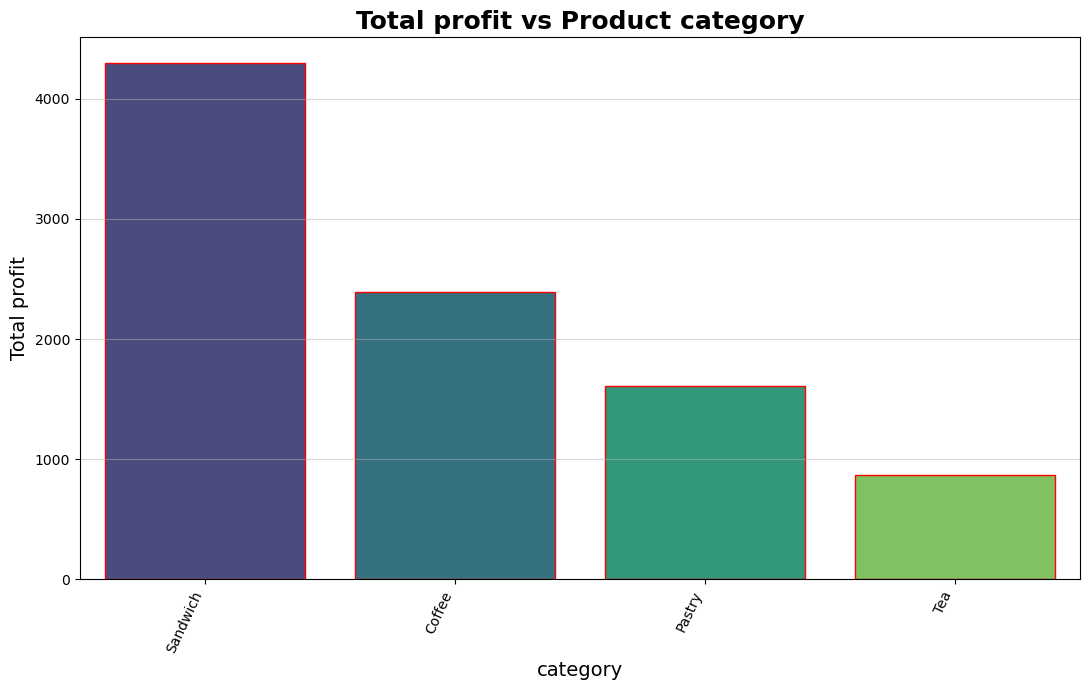

In [154]:
# Task 6: use sns.barplot() with aggregated 
# using total profit by product category
Data_to_plot = sort_total_profit_by_category.reset_index()
print(Data_to_plot)

# To create a bar chart using seaborn 
plt.figure(figsize = (11, 7))
sns.barplot(data = Data_to_plot,x = 'category',y = 'profit',palette = 'viridis',edgecolor = 'red')
plt.title('Total profit vs Product category', fontsize = 18, fontweight = 'bold')
plt.xlabel('category', fontsize = 14)
plt.ylabel('Total profit', fontsize = 14)
plt.xticks(rotation = 65, ha= 'right')
plt.grid(axis ='y', alpha = 0.5)
plt.tight_layout()
plt.show()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

*Interpretation responses here*

1. If the merge is not verified, the profit calculation which is, profit = revenue - (cost * quantity) would yield NaN values in the absence of product cost information due to a failed merging, rendering all subsequent analysis untrustworthy. Also, some transactions may contain product_IDs that are not found in the products catalog, which causes the product name, category, and cost to have NaN values. This would lead to inaccurate computations in subsequent assignments.

2. a) By category level : This offered high-level insights, such as "sandwich generates the most profit overall". Display overall category performance, indicating which product categories are most or least profitable. Also, helpful for strategic decisions, indicating whhich categories to grow or cease.

   b) By category and location combined : A category may be profitable overall but do poorly in some certain areas. Averge profit per transacion varies by category and area, indicating where to concentrate marketing efforts. Also, we can determine which categories operate best in each place.

3. Despite having less sales (624) than coffee (956), sandwiches dominate profitability (4294.84), indicating larger profit margins on food products. Also, upselling food products is more profitable than just selling beverages; sandwiches make 6.88 profit each transaction, while coffee makes 2.50.

4. Actionable recommendation: Reduce the amount of tea inventory (only 1.5 profit per transaction) and make sure sandwich ingredients are always available.

   Evidence: sandwich made 6.88 per transaction (4294.84 total profit from 624 transaction).

   Additional analysis: when do peopele buy coffee instead of sandwiches ? Make appropriate personnel and promotion decisions. 

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

The days of the week: 
0         Friday
1         Friday
2         Friday
3         Friday
4         Friday
          ...   
2728    Thursday
2729    Thursday
2730    Thursday
2731    Thursday
2732    Thursday
Name: days_of_week, Length: 2733, dtype: object

The weekedays vs weekend: 
0       False
1       False
2       False
3       False
4       False
        ...  
2728    False
2729    False
2730    False
2731    False
2732    False
Name: is_weekend, Length: 2733, dtype: bool

The weekend analysis: 
   is_weekend  total_profit  average_profit  num_transaction
0       False       7721.36        3.399982             2293
1        True       1452.08        3.307699              440
The weekend analysis: 
0    weekday
1    weekend
Name: is_weekend, dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_10488\3948900816.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = weekend_analysis,x = 'is_weekend',y = 'total_profit',palette = 'viridis')


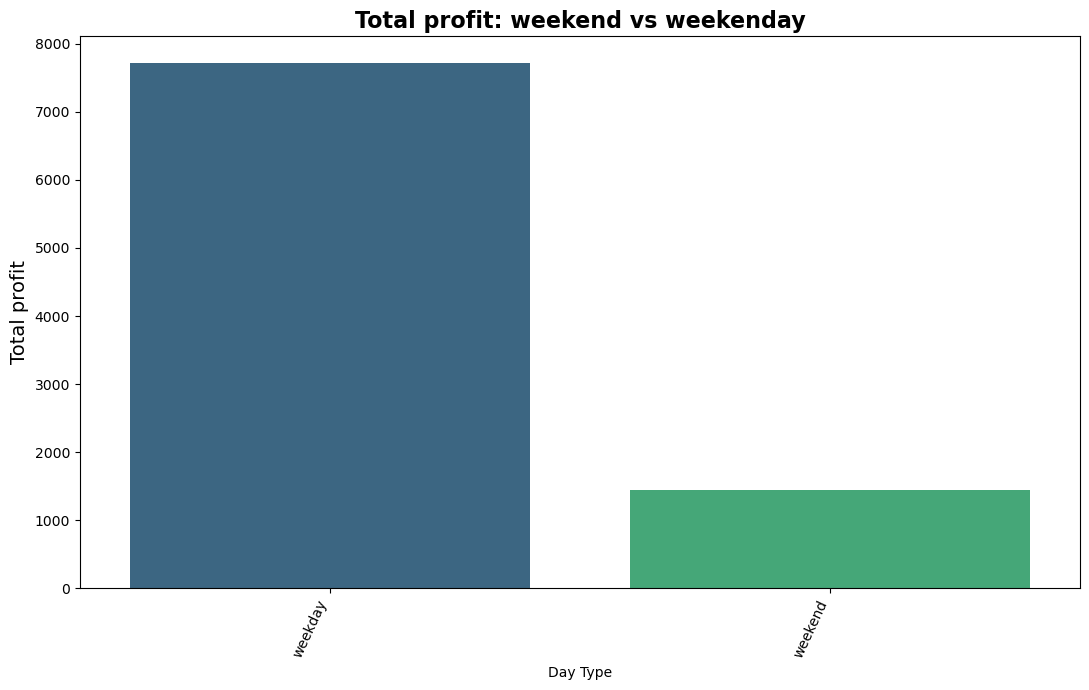

In [155]:
# Bonus: Your time-based analysis here
# Extract the days of the week
merged_dataset['days_of_week'] = merged_dataset['timestamp'].dt.day_name()
print(f"The days of the week: \n{merged_dataset['days_of_week']}\n")

# To compare the weekdays and weekends
merged_dataset['is_weekend'] = merged_dataset['days_of_week'].isin(['Saturday', 'Sunday'])
print(f"The weekedays vs weekend: \n{merged_dataset['is_weekend']}\n")
weekend_analysis = merged_dataset.groupby('is_weekend').agg(
    total_profit = ('profit', 'sum'), average_profit = ('profit', 'mean'), num_transaction = ('transaction_id', 'count')).reset_index()
print(f"The weekend analysis: \n{weekend_analysis}")
weekend_analysis['is_weekend'] = weekend_analysis ['is_weekend'].map({True: 'weekend', False: 'weekday'})
print(f"The weekend analysis: \n{weekend_analysis['is_weekend']}")

# For the visualization
plt.figure(figsize = (11, 7))
sns.barplot(data = weekend_analysis,x = 'is_weekend',y = 'total_profit',palette = 'viridis')
plt.title('Total profit: weekend vs weekenday', fontsize = 16, fontweight = 'bold')
plt.xlabel('Day Type', fontsize = 10)
plt.ylabel('Total profit', fontsize = 14)
plt.xticks(rotation = 65, ha= 'right')
plt.tight_layout()
plt.show()

### Your Findings

*Bonus findings here (state your question and what you discovered)*
QUESTION: Do weekday and weekend sales patterns differ from one another?

DISCOVERY: weekdays generate  7721.36 total profit across 2293 transactions
           weekends generate  1452.08 total profit across  440 transactions
           average profit per transaction of weekdays against weekends is  3.399982 :  3.307699  
ADVISE: I suggest weekend-specific promotion should be established. 

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.